In [5]:
!pip install tensorflow-gpu==2.8.1 tensorflow==2.8.1 stable-baselines3 gym-anytrading gym

In [6]:
import gym
import gym_anytrading
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('data/GO.csv')

df.head()

,Date,Open,High,Low,Close,Volume
0,08/26/2022,39.85,40.29,39.02,39.11,"901,104"
1,08/25/2022,39.33,39.66,38.78,39.58,"1,073,385"
2,08/24/2022,40.11,40.14,39.33,39.38,"952,458"
3,08/23/2022,39.61,40.66,38.33,39.91,"2,129,354"
4,08/22/2022,42.02,42.90,41.67,41.74,"1,274,732"


In [9]:
#sorting and setting datatype
df.sort_values('Date', ascending=True, inplace=True)
df['Date']= pd.to_datetime(df['Date'])

In [10]:
#creating the learning enviroment
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env.reset()

array([[ 2.516e+01,  1.000e-02],
       [ 2.546e+01,  3.000e-01],
       [ 2.603e+01,  5.700e-01],
       [ 2.583e+01, -2.000e-01],
       [ 2.607e+01,  2.400e-01]])

In [11]:
#creating model
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 94       |
|    ep_rew_mean        | -0.012   |
| time/                 |          |
|    fps                | 1223     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.0886  |
|    explained_variance | -2.3     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.000317 |
|    value_loss         | 0.000511 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 94        |
|    ep_rew_mean        | 0.504     |
| time/                 |           |
|    fps                | 1333      |
|    iterations         | 200       |
|    time_e

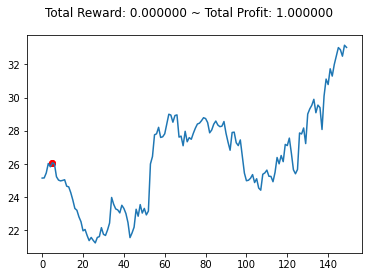

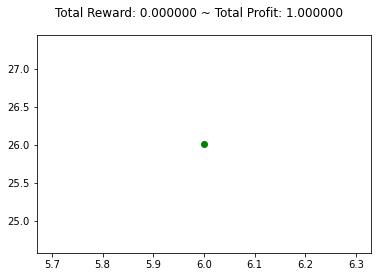

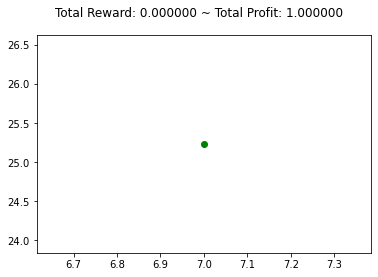

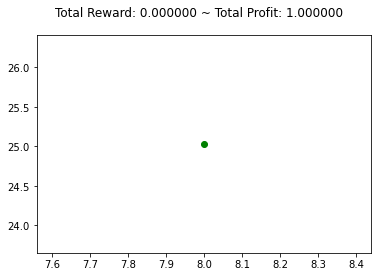

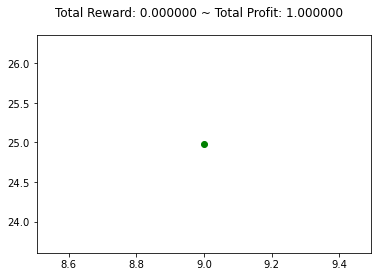

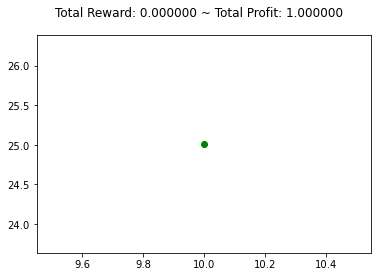

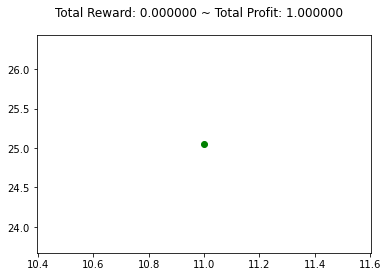

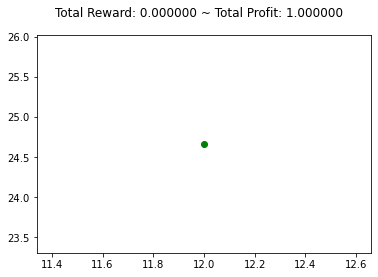

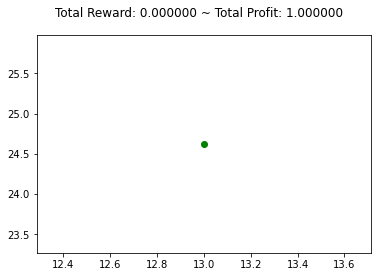

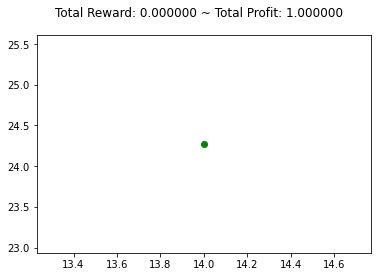

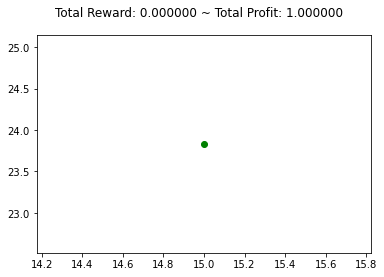

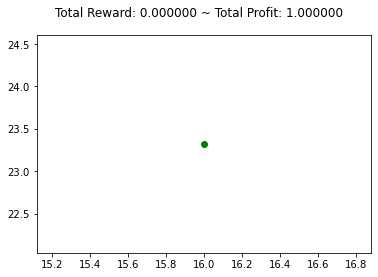

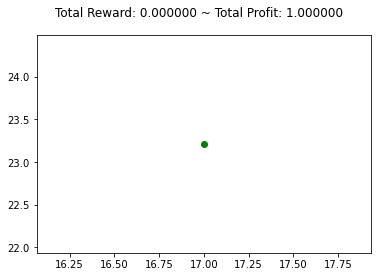

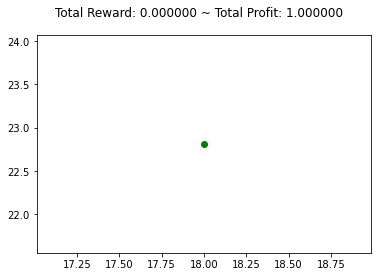

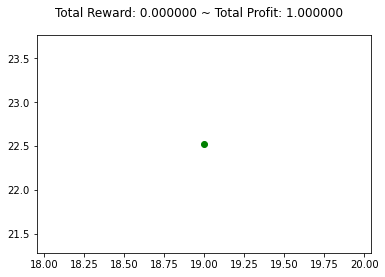

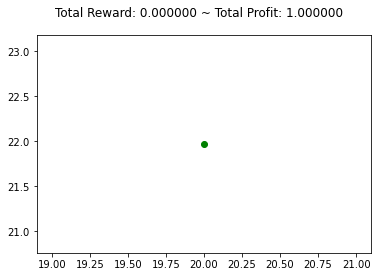

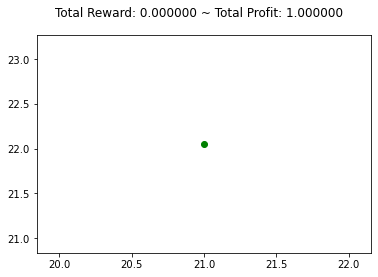

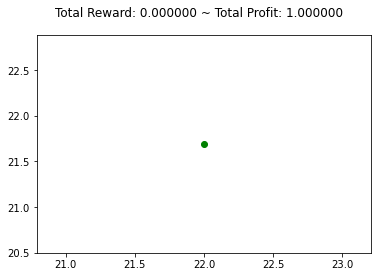

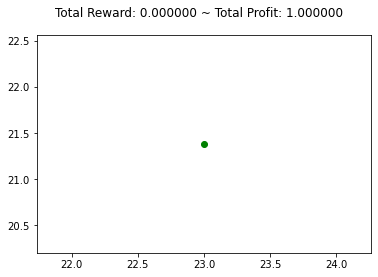

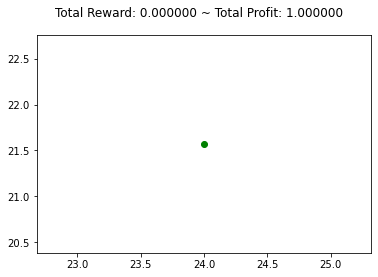

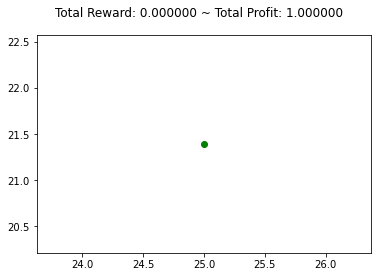

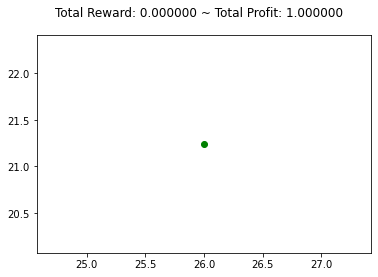

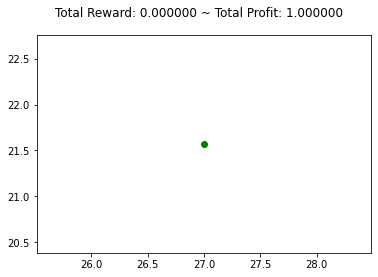

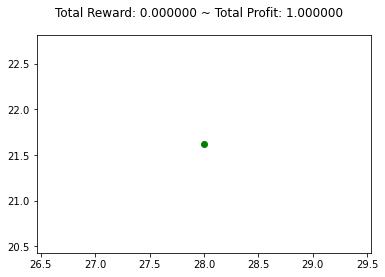

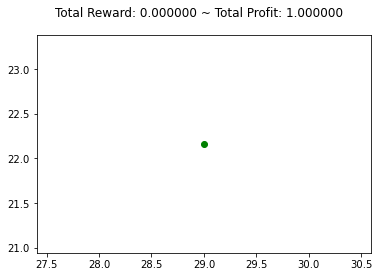

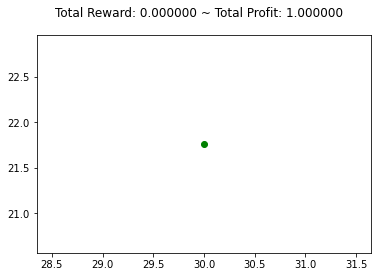

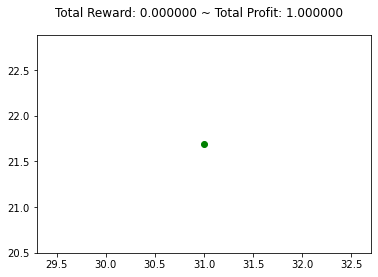

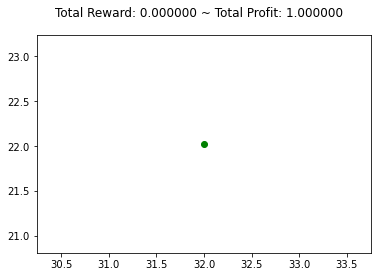

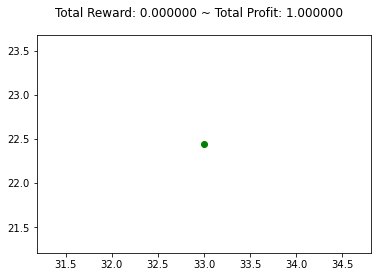

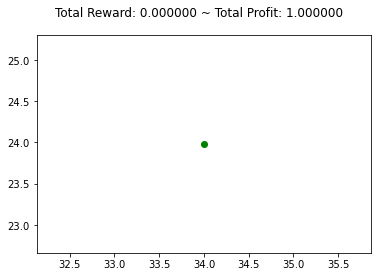

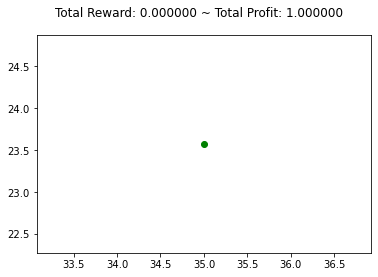

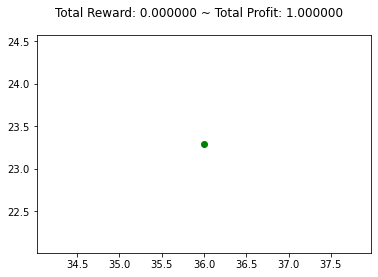

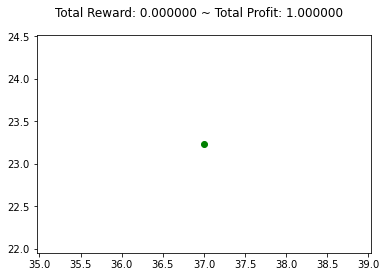

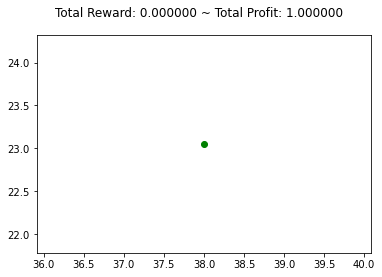

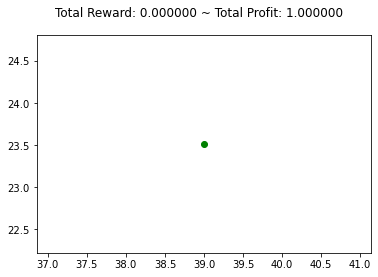

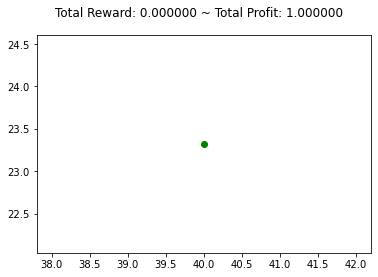

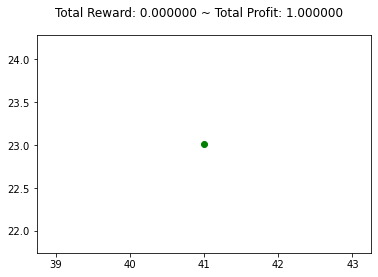

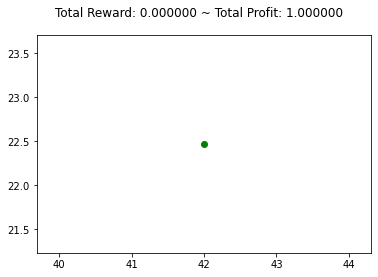

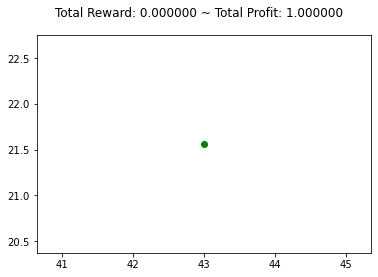

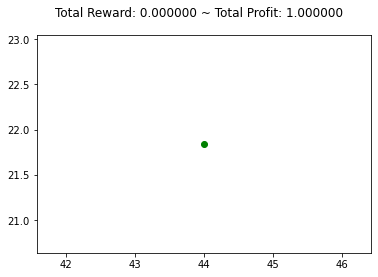

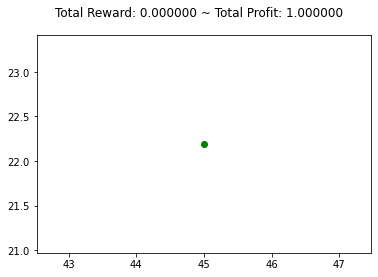

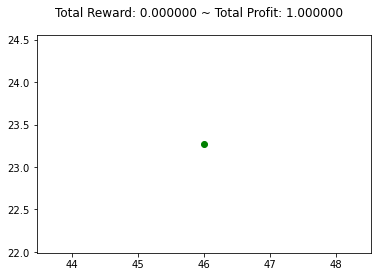

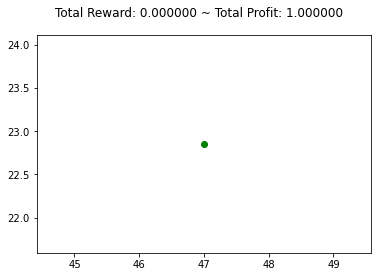

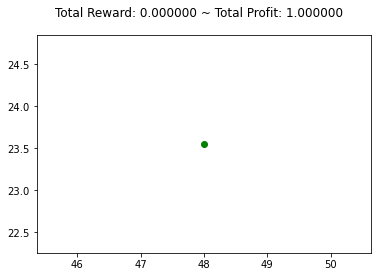

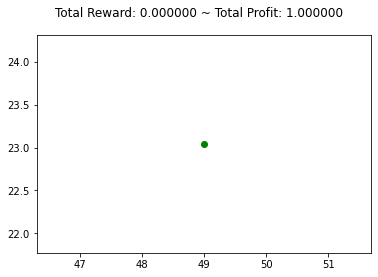

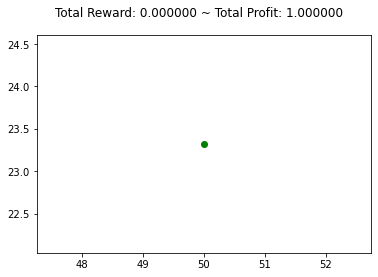

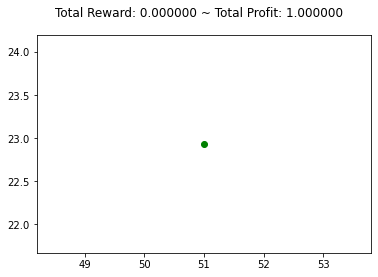

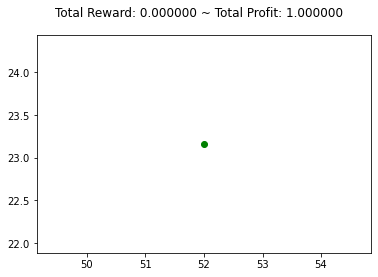

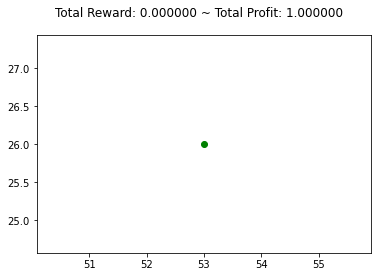

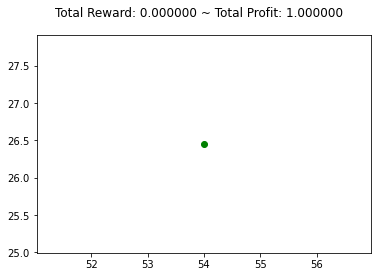

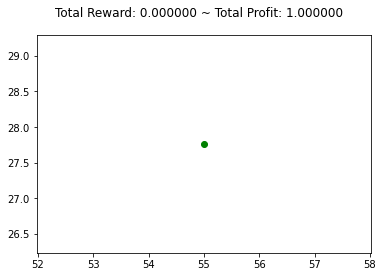

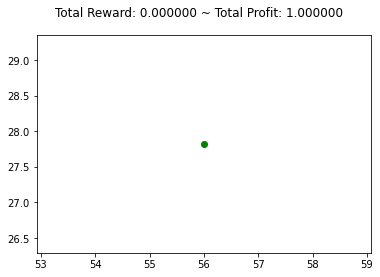

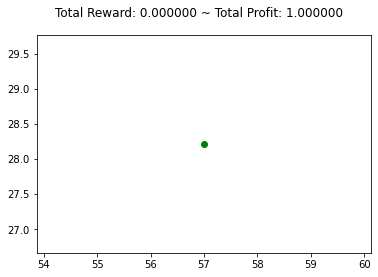

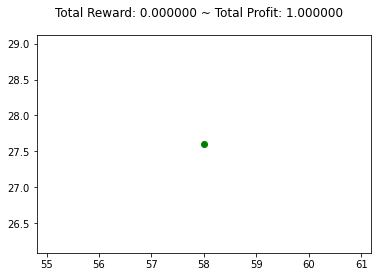

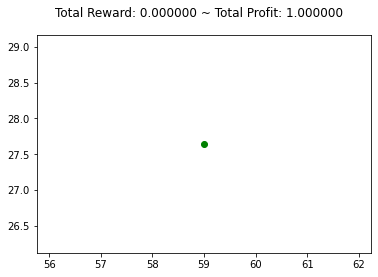

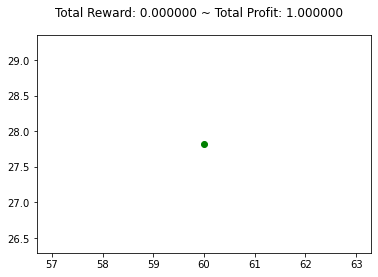

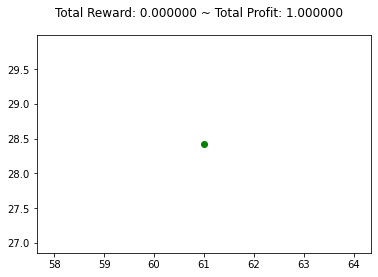

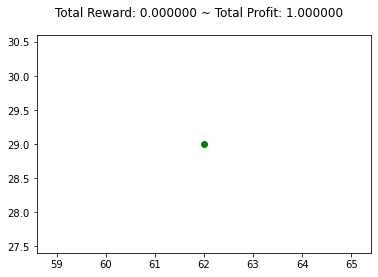

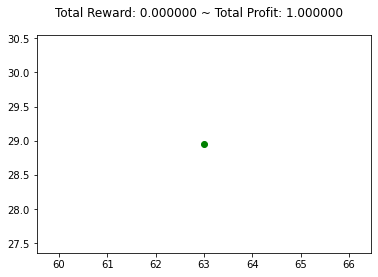

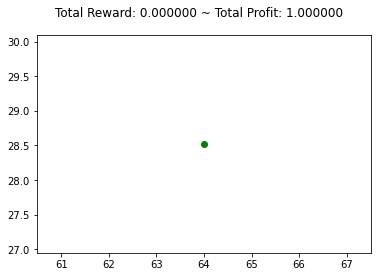

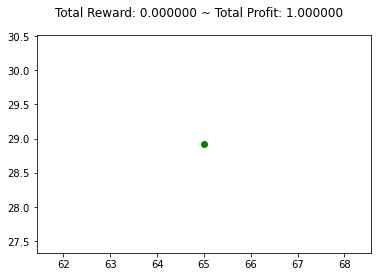

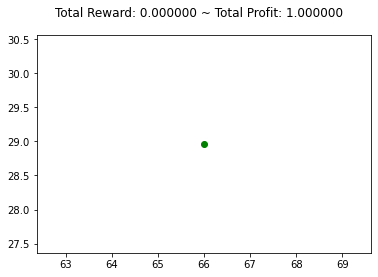

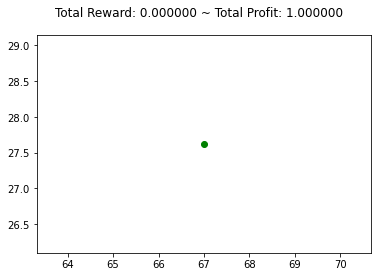

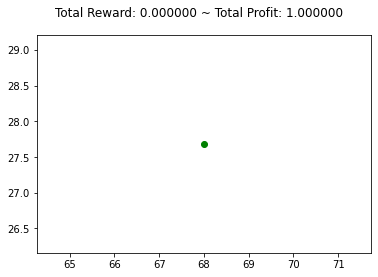

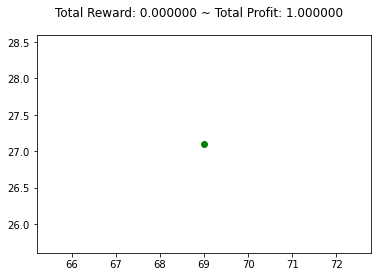

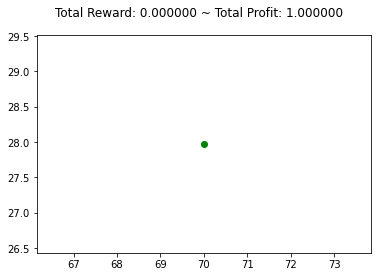

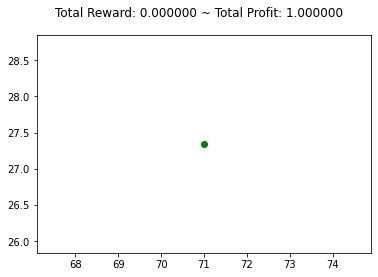

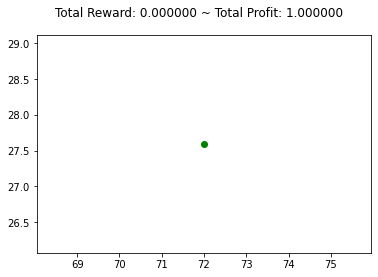

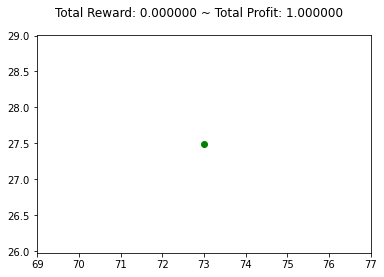

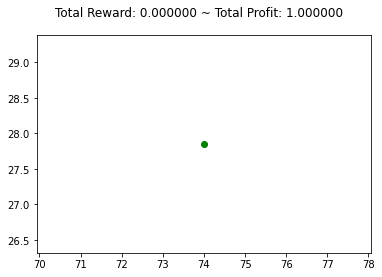

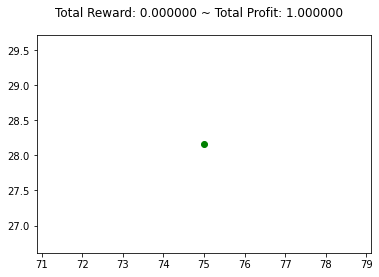

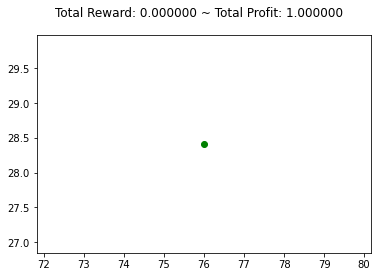

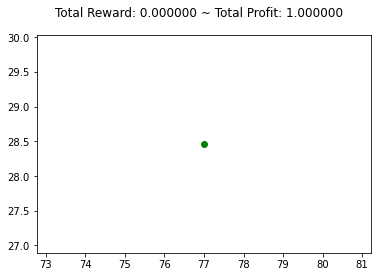

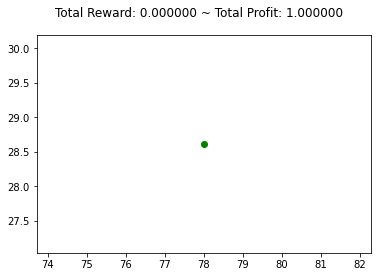

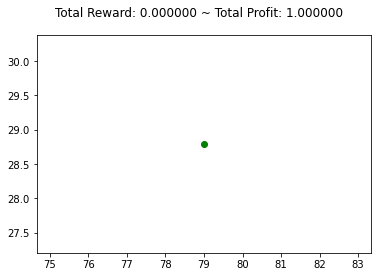

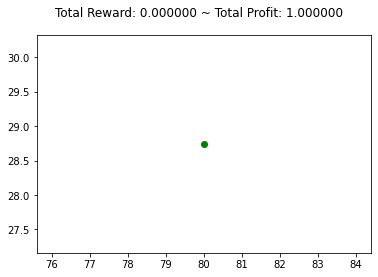

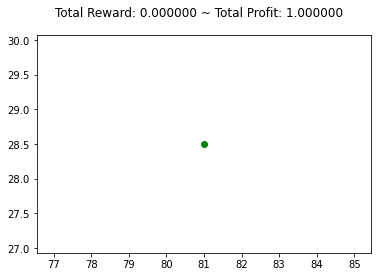

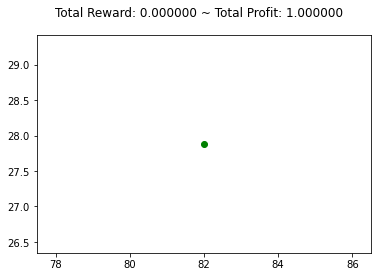

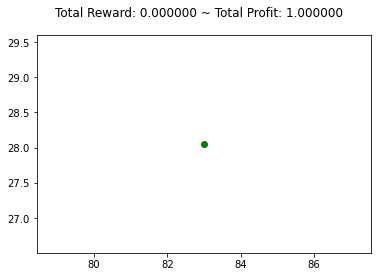

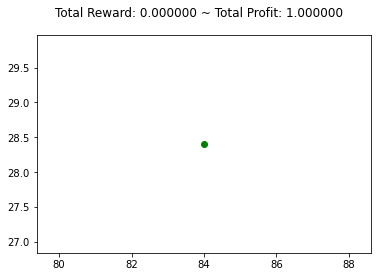

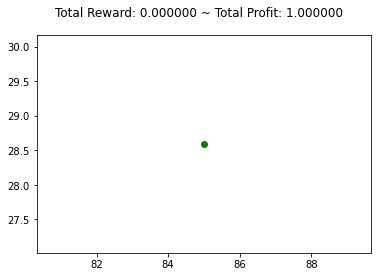

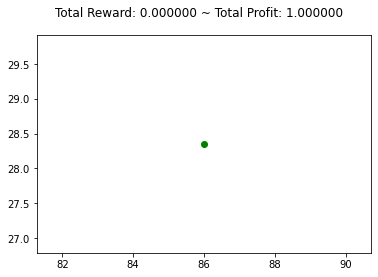

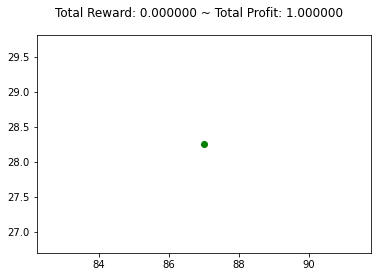

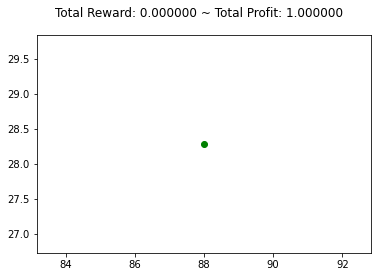

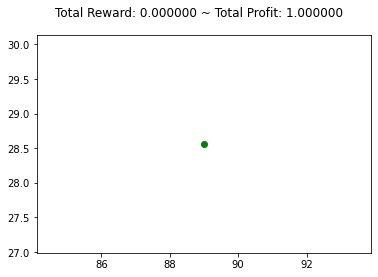

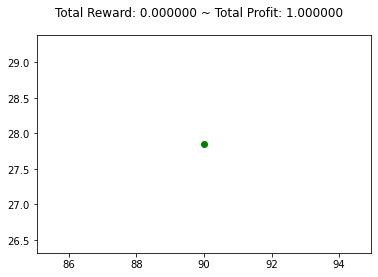

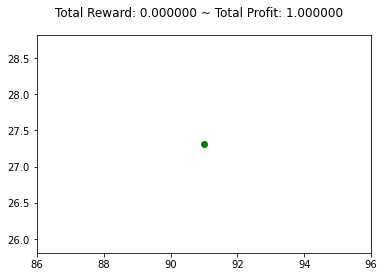

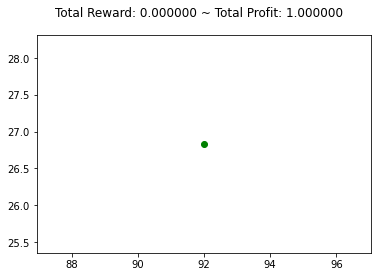

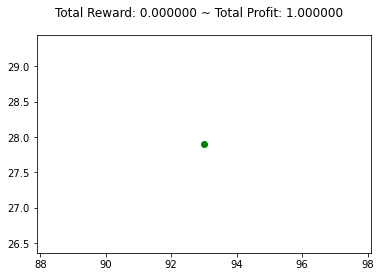

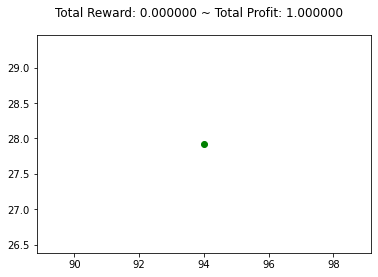

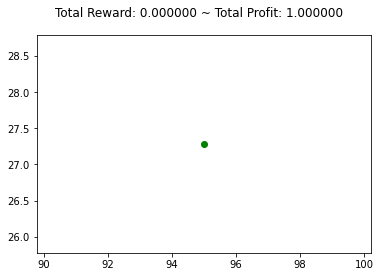

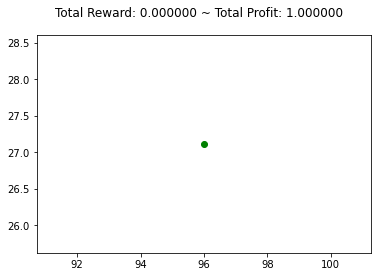

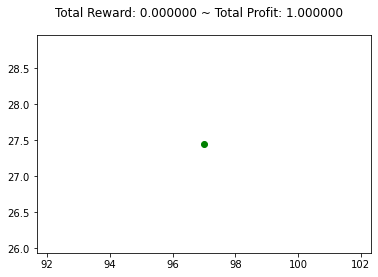

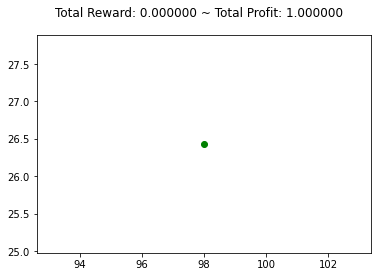

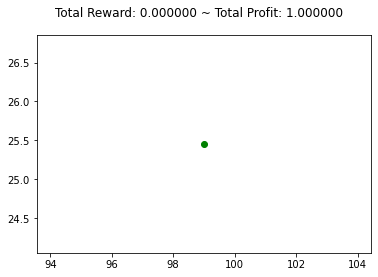

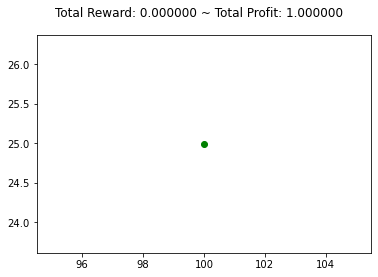

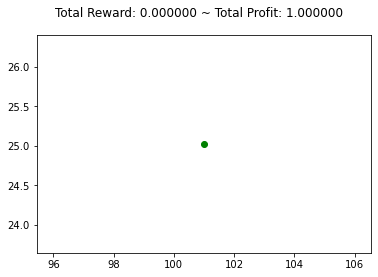

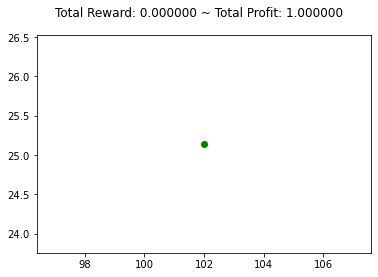

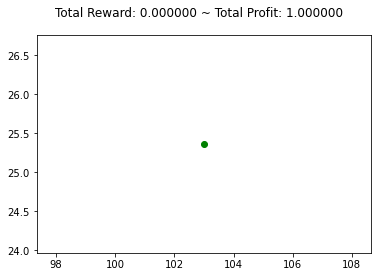

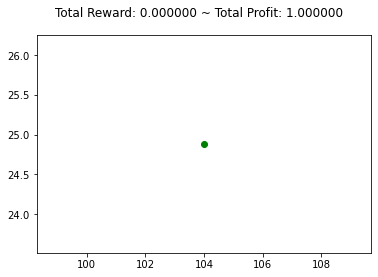

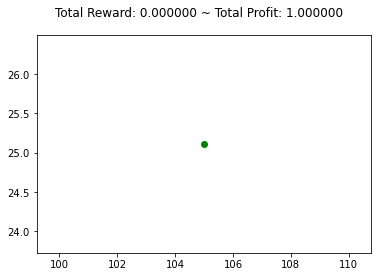

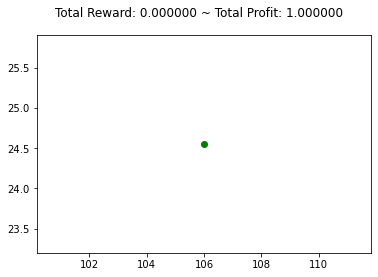

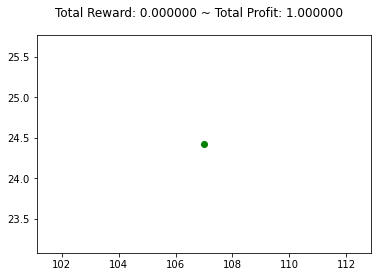

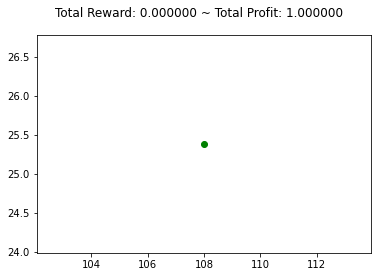

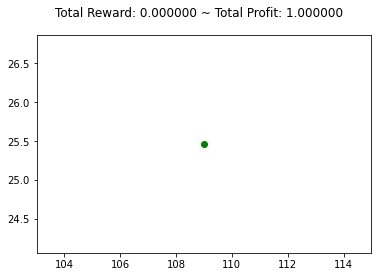

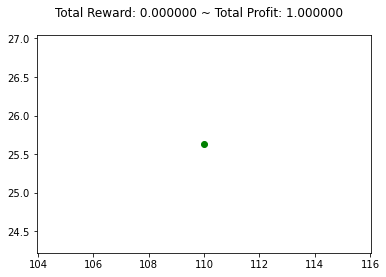

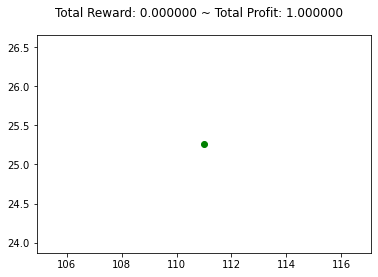

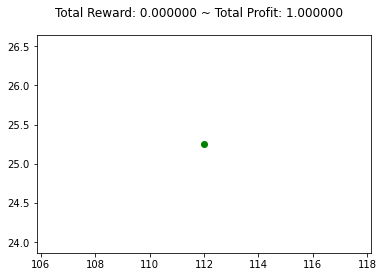

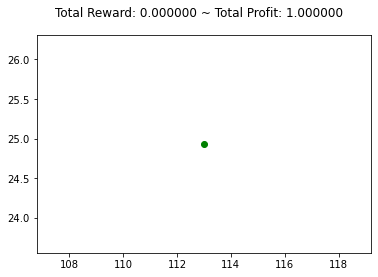

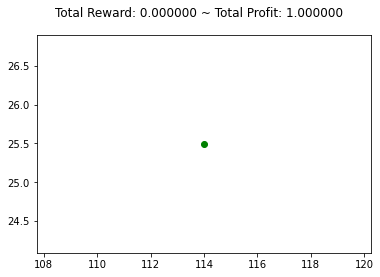

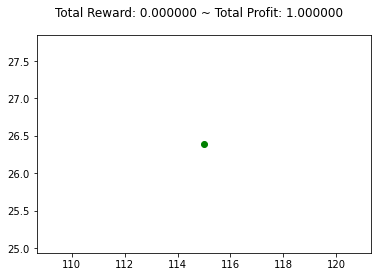

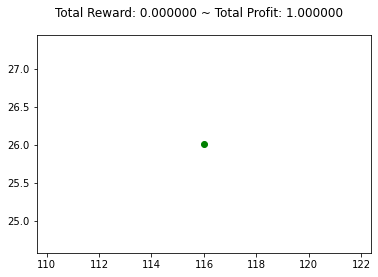

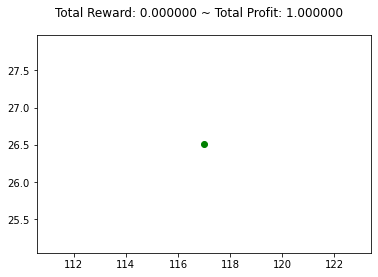

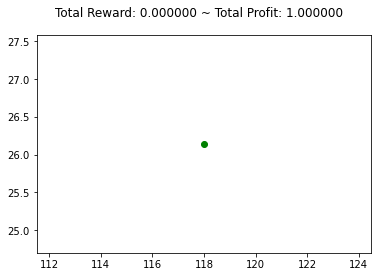

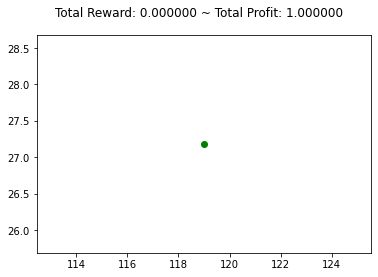

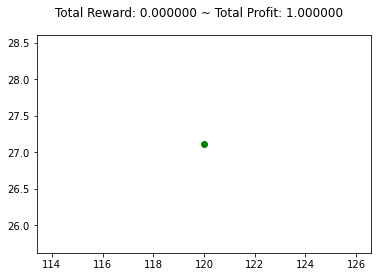

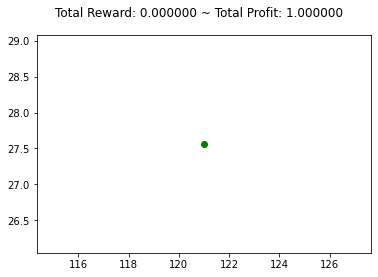

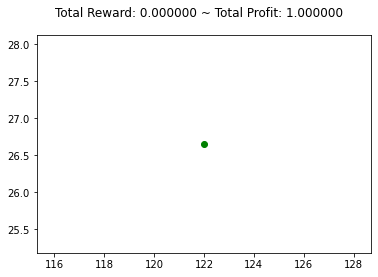

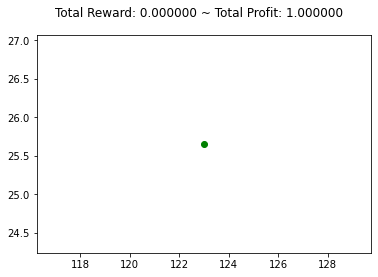

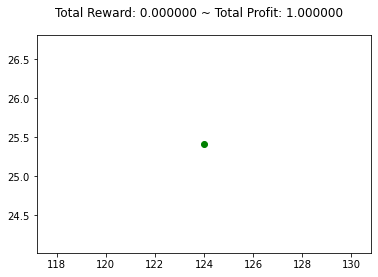

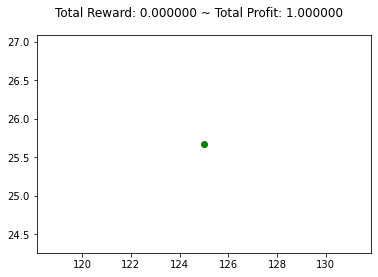

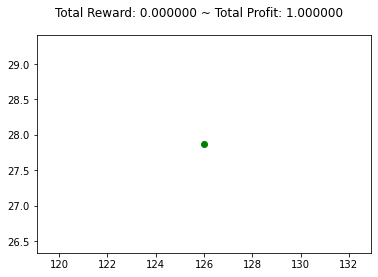

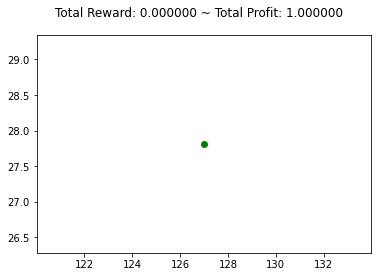

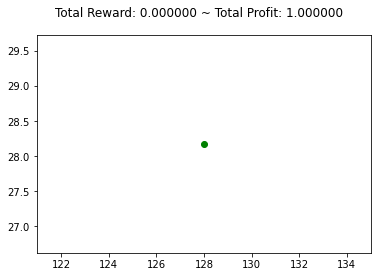

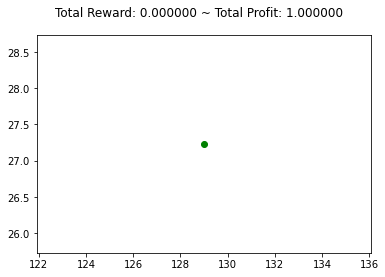

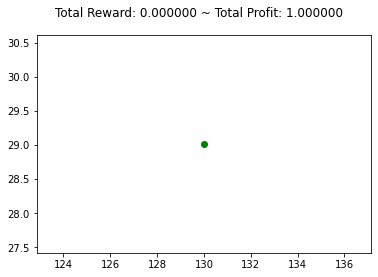

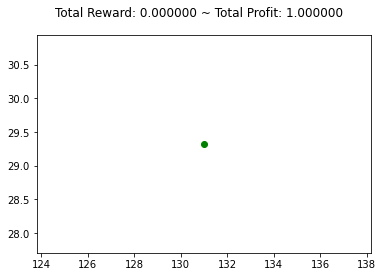

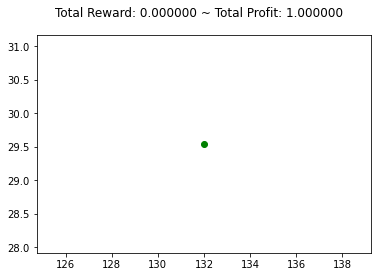

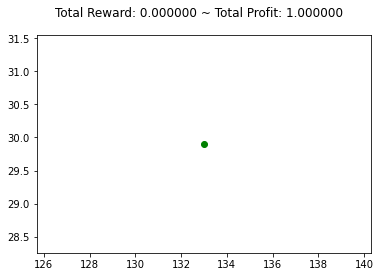

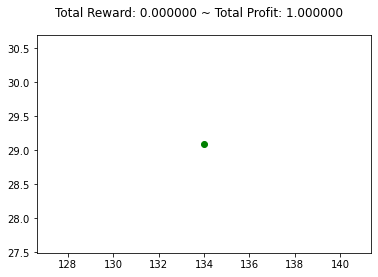

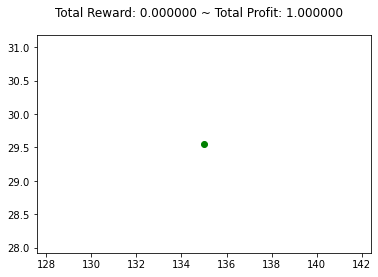

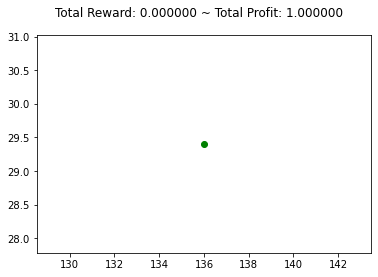

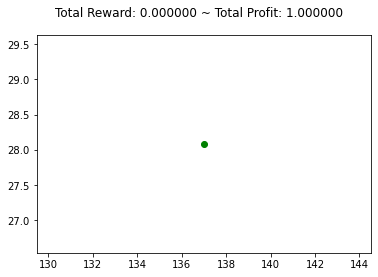

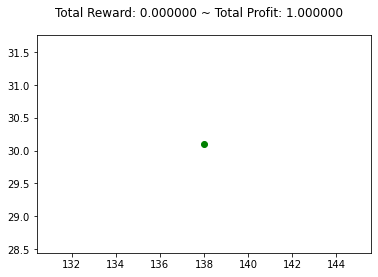

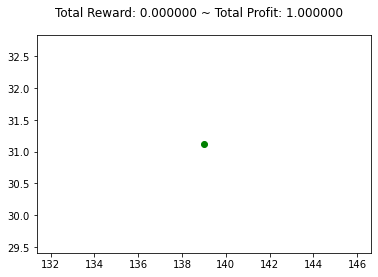

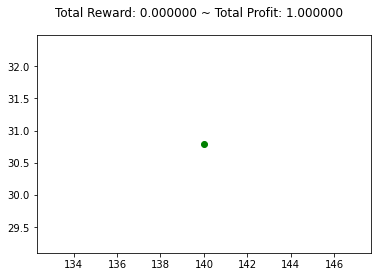

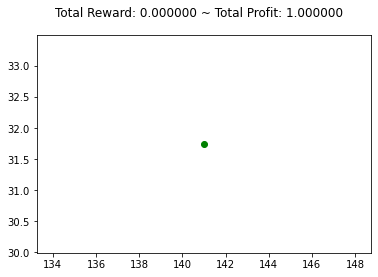

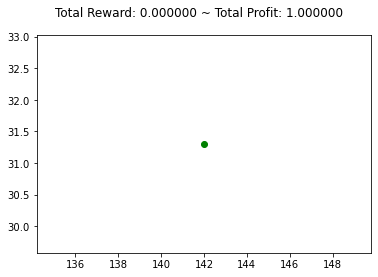

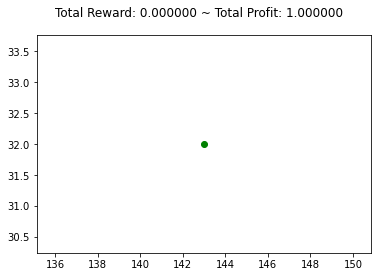

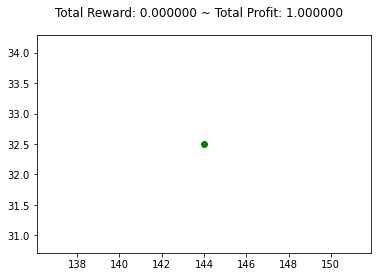

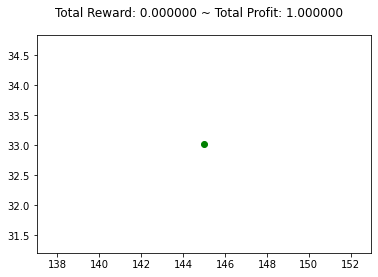

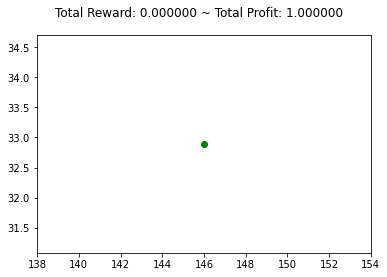

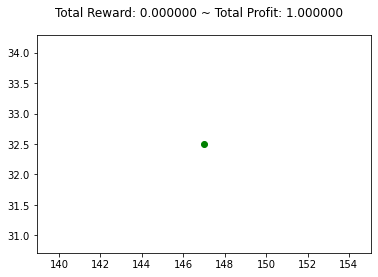

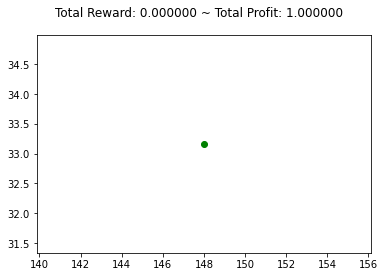

In [12]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,150), window_size=5)
obs = env.reset()


done = False 
while not done:
    obs = obs[np.newaxis, ...]
    env.render()
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
        


{'total_reward': 0.0, 'total_profit': 1.2509112456747404, 'position': 1}


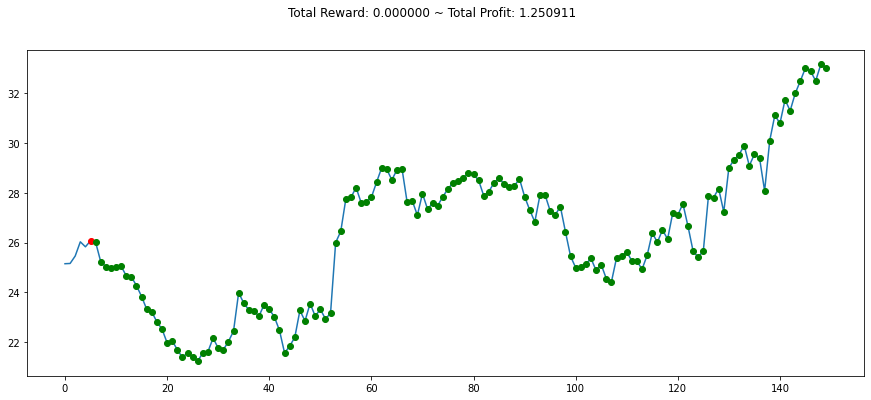

In [14]:
print(info)
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()